In [246]:
import pandas as pd
import numpy as np
from functools import reduce

## Set Up

In [247]:
des_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_descriptive_vars.dta")
ed_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_ed_vars.dta")
inperson_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_inperson_vars.dta")
patterns_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_patterns_vars.dta")
stateprograms_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_stateprograms_vars.dta")
survey0_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey0m_vars.dta")
survey6_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey6m_vars.dta")
survey12_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey12m_vars.dta")

In [248]:
#Descriptive 
des_data = des_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
des_data.replace(-1, np.nan, inplace=True)
des_subdata = des_data[['person_id', 'household_id', 'treatment',
                    'applied_app', 'approved_app', 'postn_death', 'english_list','numhh_list', 
                    'birthyear_list', 'female_list','zip_msa_list']]
des_subdata.loc[:,"numhh_list"] = des_subdata["numhh_list"] + 1
des_subdata.head(5)

,person_id,household_id,treatment,applied_app,approved_app,postn_death,english_list,numhh_list,birthyear_list,female_list,zip_msa_list
0,1.0,100001.0,1,1.0,0.0,0,1,1,1978,0.0,1.0
1,2.0,100002.0,1,0.0,0.0,0,1,1,1984,1.0,1.0
2,3.0,100003.0,0,NaN,NaN,0,1,1,1971,1.0,1.0
3,4.0,100004.0,0,NaN,NaN,0,1,1,1955,1.0,1.0
4,5.0,100005.0,1,0.0,0.0,0,0,1,1969,1.0,1.0


In [249]:
# State
stateprograms_data = stateprograms_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
stateprograms_data.replace(-1, np.nan, inplace=True)
stateprograms_data.head(5)

,person_id,ohp_all_ever_matchn_30sep2009,ohp_all_ever_firstn_survey0m,ohp_all_ever_firstn_survey6m,ohp_all_ever_inperson,ohp_all_ever_firstn_30sep2009,ohp_all_end_30sep2009,ohp_all_end_survey0m,ohp_all_end_survey6m,ohp_all_end_inperson,...,snap_tot_hh_30sep2009,snap_tot_hh_firstn_survey12m,tanf_ever_prenotify07,tanf_ever_presurvey12m,tanf_ever_matchn_30sep2009,tanf_ever_firstn_survey12m,tanf_tot_hh_prenotify07,tanf_tot_hh_presurvey12m,tanf_tot_hh_30sep2009,tanf_tot_hh_firstn_survey12m
0,1.0,0,0.0,NaN,NaN,0,0,0.0,NaN,NaN,...,746,2624.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2.0,1,1.0,NaN,NaN,1,0,1.0,NaN,NaN,...,3962,5154.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,3.0,0,0.0,NaN,NaN,0,0,0.0,NaN,NaN,...,3212,3374.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,4.0,1,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,1260,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN
4,5.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [250]:
# Education
ed_data = ed_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
ed_data.replace(-1, np.nan, inplace=True)
ed_data.head(5)

,person_id,sample_ed,any_visit_pre_ed,any_visit_ed,num_visit_pre_cens_ed,num_visit_cens_ed,any_hosp_pre_ed,any_hosp_ed,num_hosp_pre_cens_ed,num_hosp_cens_ed,...,ed_charg_tot_pre_ed,ed_charg_tot_ed,any_hiun_pre_ed,any_hiun_ed,num_hiun_pre_cens_ed,num_hiun_cens_ed,any_loun_pre_ed,any_loun_ed,num_loun_pre_cens_ed,num_loun_cens_ed
0,60562.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0
1,51142.0,1.0,0,1,0.0,3.0,0,0,0.0,0.0,...,0.0,2220.699951,0,1,0.0,3.0,0,0,0.0,0.0
2,60314.0,1.0,0,1,0.0,2.0,0,1,0.0,1.0,...,0.0,4529.549805,0,1,0.0,2.0,0,0,0.0,0.0
3,50902.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0
4,70733.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0


In [251]:
# In Person
inperson_data = inperson_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
inperson_data.replace(-1, np.nan, inplace=True)
inperson_data.head(5)

,person_id,in_data_inp,sample_resp_inp,weight_total_inp,dt_release_inp,dt_completed_inp,interview_location_inp,interviewer_inp,scale_id_inp,stadio_id_inp,...,has_hght_wght_inp,has_dbs_inp,has_all_dbs_inp,rx_any_mod_inp,rx_num_mod_inp,hbp_diure_med_inp,antihyperlip_med_inp,diabetes_med_inp,antidep_med_inp,meds_miss_inp
0,45656.0,0,0,3.208729,2010-05-17,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65912.0,0,1,1.150416,2009-11-30,2009-12-15,1.0,48.0,38.0,38.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37139.0,0,1,1.003278,2010-03-09,2010-04-07,1.0,28.0,38.0,38.0,...,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
3,64670.0,0,1,1.159381,2010-01-13,2010-01-19,0.0,6.0,28.0,15.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65225.0,0,0,0.000000,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# Patterns
patterns_data = patterns_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
patterns_data.replace(-1, np.nan, inplace=True)
patterns_data.head(5)

,person_id,household_id,any_visit_180p_180,any_visit_180p_360,any_visit_180p_540,any_visit_180p_720,preperiod_any_visits,medicaid_all_180p_period_180,medicaid_all_180p_period_360,medicaid_all_180p_period_540,...,pobox_list,first_day_list,self_list,ohp_all_ever_inperson,dt_completed_inp,weight_total_inp,sample_inp_resp,doc_any_incl_probe_inp,ed_any_incl_probe_inp,any_inp_match_ed
0,8218.0,108218.0,0,0,1,0,0,1,1,1,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
1,62755.0,162755.0,0,1,1,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
2,27528.0,127528.0,0,0,0,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
3,67031.0,167031.0,0,0,0,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
4,45656.0,145656.0,0,1,0,0,1,0,0,0,...,0,1,1,0,NaT,3.208729,0.0,NaN,NaN,NaN


In [253]:
# Survey 0
survey0_data = survey0_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey0_data.replace(-1, np.nan, inplace=True)
survey0_data.head(5)

,person_id,sample_0m,wave_survey0m,dt_mail_0m,returned_0m,dt_returned_0m,ret_mode_0m,surv_lang_0m,in_survey_0m,app_received_0m,...,race_other_qn_0m,employ_hrs_0m,edu_0m,living_arrange_0m,hhsize_0m,hhinc_pctfpl_0m,num19_0m,num19_hi_0m,cost_tot_oop_correct_0m,cost_medical_oop_0m
0,1.0,1,5.0,2008-08-21,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1,5.0,2008-08-21,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1,3.0,2008-07-23,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,NaN,NaT,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2008-09-07,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
# Survey 6
survey6_data = survey6_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey6_data.replace(-1, np.nan, inplace=True)
survey6_data.head(5)

,person_id,sample_6m,wave_survey6m,dt_mail_6m,returned_6m,dt_returned_6m,ret_mode_6m,surv_lang_6m,in_survey_6m,weight_6m,...,live_partner_6m,live_alone_6m,live_parents_6m,live_relatives_6m,live_friends_6m,live_other_6m,hhsize_6m,hhinc_pctfpl_6m,num19_6m,num19_hi_6m
0,1.0,0,5.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0,5.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0,3.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,NaN,NaT,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2009-03-02,1.0,2009-03-09,Mail,Spanish,1.0,1.248947,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,NaN,0.0,NaN


In [255]:
# Survey 12
survey12_data = survey12_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey12_data.replace(-1, np.nan, inplace=True)
survey12_data.head(5)

,person_id,sample_12m,dt_mail_12m,dt_returned_12m,ret_mode_12m,returned_12m,surv_lang_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,1,5.0,2009-11-24,Mail,1.0,English,1.0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,1,5.0,2009-08-31,Mail,1.0,English,1.0,1,0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3.0,1,3.0,NaT,,0.0,,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,,NaN,,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2009-08-21,Mail,1.0,Spanish,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,0.0


In [256]:
dfs = [des_subdata, stateprograms_data, ed_data, inperson_data, patterns_data, survey0_data, survey6_data, survey12_data]

merged = reduce(lambda left, right: pd.merge(left, right, on='person_id', how='outer'), dfs)

merged.describe()
 

,person_id,household_id_x,treatment_x,applied_app,approved_app,postn_death,english_list_x,numhh_list_x,birthyear_list_x,female_list_x,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
count,74922.000000,74922.000000,74922.000000,29799.000000,29799.000000,74922.000000,74922.000000,74922.000000,74922.000000,74921.000000,...,23775.000000,23777.000000,23777.000000,23777.000000,23776.000000,22518.000000,2.272100e+04,22940.000000,22860.000000,23172.000000
mean,37461.500000,140311.609375,0.398201,0.608175,0.291889,0.007955,0.914044,1.234270,1968.076987,0.550553,...,0.167739,0.103167,0.231779,0.103041,0.084918,10.330225,7.102876e+07,0.619137,0.719641,0.410236
min,1.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1945.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,18731.250000,122288.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1958.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,37461.500000,141644.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1968.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000e+00,1.000000,1.000000,0.000000
75%,56191.750000,159051.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1979.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000e+00,1.000000,1.000000,1.000000
max,74922.000000,174922.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1988.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,163559.000000,1.613841e+12,1.000000,1.000000,1.000000
std,21628.263672,21441.220703,0.489531,0.488166,0.454639,0.088836,0.280301,0.428495,12.202943,0.497441,...,0.373642,0.304183,0.421977,0.304018,0.278765,1089.963867,1.070649e+10,0.485610,0.449184,0.491887


In [257]:
df_filtered = merged.filter(regex='^(?!.*_y$)')

df_filtered.head(5)

,person_id,household_id_x,treatment_x,applied_app,approved_app,postn_death,english_list_x,numhh_list_x,birthyear_list_x,female_list_x,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,100001.0,1,1.0,0.0,0,1,1,1978,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,100002.0,1,0.0,0.0,0,1,1,1984,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3.0,100003.0,0,NaN,NaN,0,1,1,1971,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,100004.0,0,NaN,NaN,0,1,1,1955,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,100005.0,1,0.0,0.0,0,0,1,1969,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74917,74918.0,174918.0,0,NaN,NaN,0,1,1,1955,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74918,74919.0,174919.0,1,1.0,1.0,0,1,1,1979,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74919,74920.0,174920.0,0,NaN,NaN,0,1,1,1965,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74920,74921.0,174921.0,1,1.0,1.0,0,1,1,1948,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [258]:
filtered_columns = [col for col in df_filtered.columns if col.endswith(('_x', '_y', '_z'))]
filtered_columns

['household_id_x',
 'treatment_x',
 'english_list_x',
 'numhh_list_x',
 'birthyear_list_x',
 'female_list_x',
 'ohp_all_ever_inperson_x',
 'any_inp_match_ed_x',
 'weight_total_inp_x',
 'dt_completed_inp_x',
 'doc_any_incl_probe_inp_x',
 'ed_any_incl_probe_inp_x']

In [273]:
df_filtered = df_filtered.rename(lambda x: x.replace('_x', ''), axis=1)


## Definition of variables

In [259]:
# Self-perceived physical/mental health outcome at 12 

df_filtered[['happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 'dep_interest_12m', 'dep_sad_12m']]

,happiness_12m,health_gen_bin_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,health_work_12m,dep_interest_12m,dep_sad_12m
0,2.0,0.0,0.0,15.0,30.0,0.0,3.0,3.0
1,1.0,0.0,0.0,3.0,12.0,1.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,30.0,30.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
74917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74920,1.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0


In [277]:
# Self-perceived physical/mental health outcome at 0

df_filtered[['happiness_0m', 'health_gen_bin_0m', 'health_chg_bin_0m', 'baddays_phys_0m', 'baddays_ment_0m', 'health_work_0m', 'dep_interest_0m', 'dep_sad_0m']]

KeyError: "['happiness_0m', 'health_work_0m', 'dep_interest_0m', 'dep_sad_0m'] not in index"

In [260]:
# Financial health/strain outcome

df_filtered[['cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m']]


,cost_any_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
74917,NaN,NaN,NaN,NaN,NaN,NaN
74918,NaN,NaN,NaN,NaN,NaN,NaN
74919,NaN,NaN,NaN,NaN,NaN,NaN
74920,1.0,398.0,0.0,0.0,0.0,0.0


In [276]:
df_filtered[['cost_any_oop_0m', 'cost_tot_oop_0m', 'cost_any_owe_0m', 'cost_tot_owe_0m', 'cost_borrow_0m', 'cost_refused_0m']]

,cost_any_oop_0m,cost_tot_oop_0m,cost_any_owe_0m,cost_tot_owe_0m,cost_borrow_0m,cost_refused_0m
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74917,NaN,NaN,NaN,NaN,NaN,NaN
74918,1.0,330.0,1.0,15000.0,1.0,0.0
74919,NaN,NaN,NaN,NaN,NaN,NaN
74920,1.0,230.0,0.0,0.0,1.0,0.0


In [261]:
# Health care utilization outcome

df_filtered[['rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']]


,rx_any_12m,rx_num_mod_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,hosp_any_12m,hosp_num_mod_12m
0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
74917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74920,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_filtered[['treatment','applied_app','approved_app']]

## Analysis

In [262]:
import matplotlib.pyplot as plt

#### Treatment

In [263]:
des_subdata.describe()

,person_id,household_id,treatment,applied_app,approved_app,postn_death,english_list,numhh_list,birthyear_list,female_list,zip_msa_list
count,74922.000000,74922.000000,74922.000000,29799.000000,29799.000000,74922.000000,74922.000000,74922.000000,74922.000000,74921.000000,74920.000000
mean,37461.500000,140311.609375,0.398201,0.608175,0.291889,0.007955,0.914044,1.234270,1968.076987,0.550553,0.769421
std,21628.263672,21441.220703,0.489531,0.488166,0.454639,0.088836,0.280301,0.428495,12.202943,0.497441,0.421206
min,1.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1945.000000,0.000000,0.000000
25%,18731.250000,122288.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1958.000000,0.000000,1.000000
50%,37461.500000,141644.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1968.000000,1.000000,1.000000
75%,56191.750000,159051.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1979.000000,1.000000,1.000000
max,74922.000000,174922.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1988.000000,1.000000,1.000000


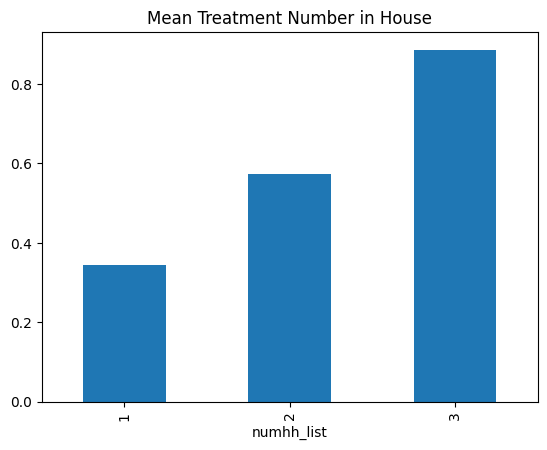

In [264]:
grouped_mean = des_subdata.groupby('numhh_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Number in House')
plt.show()

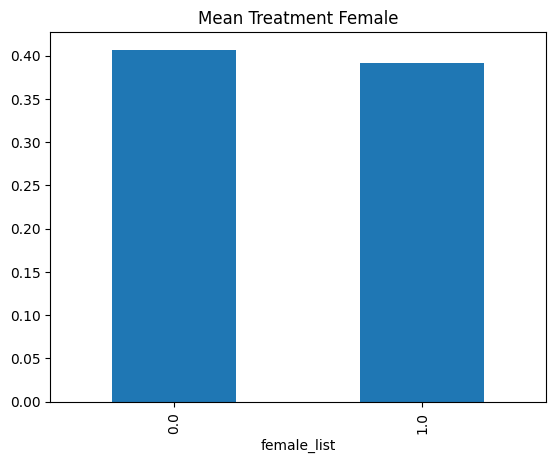

In [265]:
grouped_mean = des_subdata.groupby('female_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Female')
plt.show()

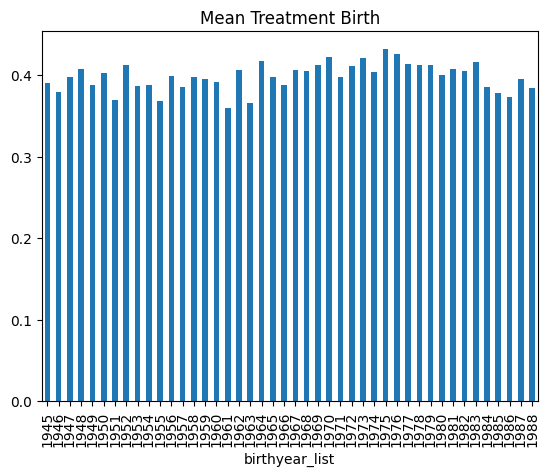

In [266]:
grouped_mean = des_subdata.groupby('birthyear_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Birth')
plt.show()

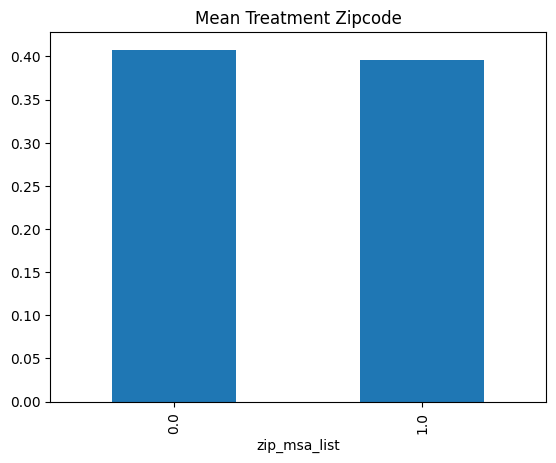

In [267]:
grouped_mean = des_subdata.groupby('zip_msa_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Zipcode')
plt.show()

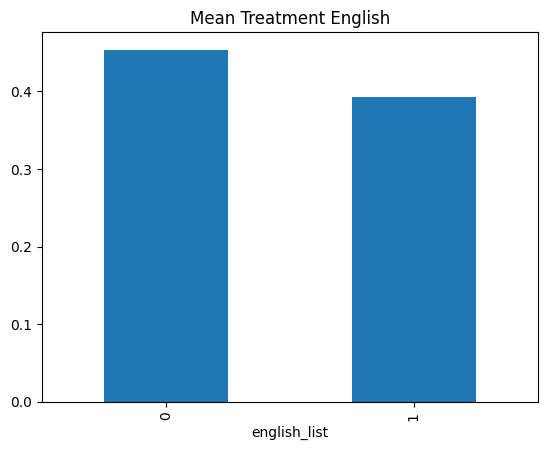

In [268]:
grouped_mean = des_subdata.groupby('english_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment English')
plt.show()

#### Applicaton and Approval

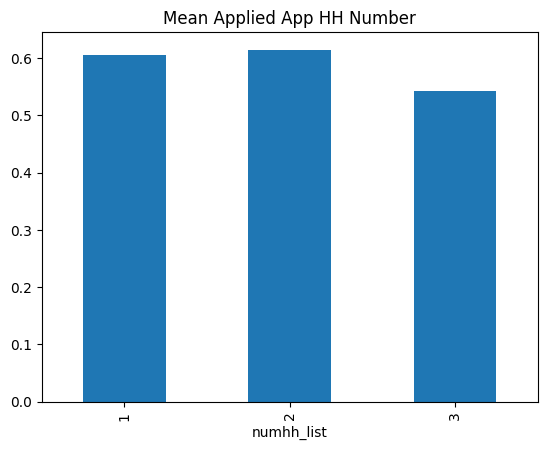

In [269]:
grouped_mean = des_subdata.groupby('numhh_list')['applied_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Applied App HH Number')
plt.show()

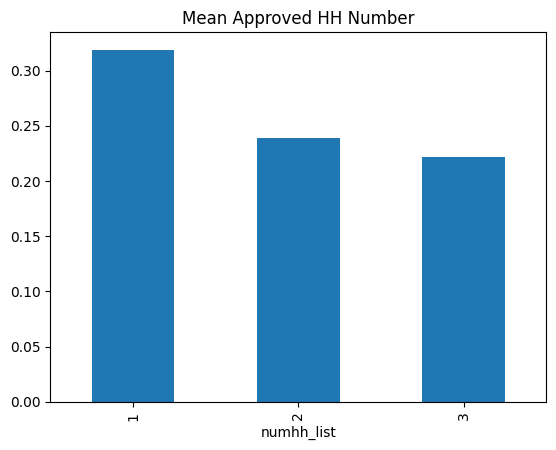

In [270]:
grouped_mean = des_subdata.groupby('numhh_list')['approved_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Approved HH Number')
plt.show()

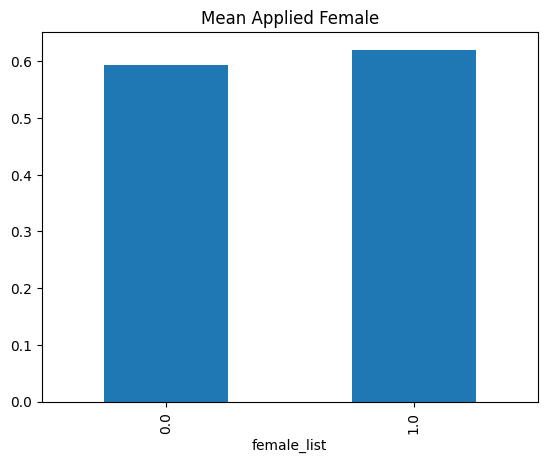

In [271]:
grouped_mean = des_subdata.groupby('female_list')['applied_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Applied Female')
plt.show()

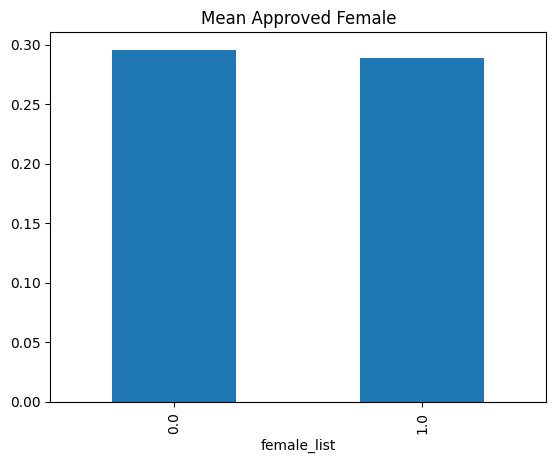

In [272]:
grouped_mean = des_subdata.groupby('female_list')['approved_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Approved Female')
plt.show()